## Loading Data 

In [1]:
import pandas as pd
data = pd.read_csv('gold.csv')

In [2]:
data.head()

,3M Libor_T-1,EM Bond_T-1,US Bond ETF_T-1,Wheat 1_T-1,Wheat 2_T-1,Crude Palm Oil_T-1,Brent 1_T-1,Brent 2_T-1,Light Crude_T-1,White Sugar_T-1,...,MSCI EM_T-22,Shanghai Index_T-22,Nikkei Ind_T-22,MSCI APAC ex J_T-22,EMEquity ETF_T-22,Silver_T-22,Platinum_T-22,Palladium_T-22,Gold_T-22,Gold_T+22
0,0.000000,0.000879,0.001050,0.013158,0.013562,0.003163,-0.007879,-0.004945,-0.003486,-0.024706,...,-0.009862,0.073090,-0.028816,-0.001613,-0.012274,-0.025210,0.024300,0.082695,0.053534,0.004648
1,-0.004587,0.004096,0.002383,0.043599,0.041035,0.040991,0.042356,0.039759,0.029667,0.047906,...,0.006801,0.099088,-0.043704,0.007670,0.018151,0.060624,0.068595,0.151468,0.085822,-0.002105
2,-0.003465,-0.002040,0.000856,0.020444,0.017995,0.003462,0.006222,0.006541,0.007172,0.005262,...,0.014873,0.102887,-0.051438,0.007525,0.028712,0.056289,0.083520,0.134763,0.083915,-0.037438
3,-0.004624,0.000584,-0.002090,-0.015679,-0.012626,0.021992,0.003029,0.004249,0.002498,0.020775,...,0.004931,0.087208,-0.054678,0.005445,0.001445,0.041620,0.061601,0.109940,0.076738,-0.028097
4,-0.009292,-0.000486,0.001047,-0.003540,-0.002558,-0.012658,-0.024912,-0.022026,-0.023551,-0.025000,...,-0.003838,0.076564,-0.076171,-0.009558,-0.003904,0.058352,0.069414,0.094311,0.084487,-0.045466


## Importing pycaret regression model 

In [3]:
from pycaret.regression import *

## Initializing setup in pycaret 

In [4]:
s = setup(data, 'Gold_T+22')

 
Setup Succesfully Completed!


Description,Value
session_id,928
Original Data,"(2558, 120)"
Sampled Data,"(2558, 120)"
Sample %,1
Training Set,"(1790, 120)"
Testing Set,"(768, 120)"


## compare all models 

In [5]:
compare_models(blacklist=['tr'])

,Model,MAE,MSE,RMSE,R2,ME
0,K Neighbors Regressor,0.0145,0.0004,0.0206,0.7773,0.0904
1,Extra Trees Regressor,0.0196,0.0007,0.0265,0.6324,0.1061
2,Random Forest,0.023,0.0009,0.0306,0.5121,0.1068
3,Gradient Boosting Regressor,0.0252,0.0011,0.0325,0.4513,0.116
4,Decision Tree,0.0299,0.0019,0.0431,0.0162,0.1643
5,AdaBoost Regressor,0.0313,0.0015,0.0386,0.2226,0.1153
6,Huber Regressor,0.0327,0.0018,0.0426,0.0583,0.1546
7,Bayesian Ridge,0.0328,0.0018,0.0419,0.0893,0.1441
8,Ridge Regression,0.0329,0.0018,0.0421,0.0791,0.1431
9,Orthogonal Matching Pursuit,0.0335,0.0019,0.043,0.0409,0.1434


## ensemble model 

In [6]:
knn = create_model('knn', verbose=False)
bagged_knn = ensemble_model(knn)

,MAE,MSE,RMSE,R2,ME
0,0.0144,0.0004,0.0198,0.7390,0.0669
1,0.0171,0.0008,0.0279,0.6676,0.1604
2,0.0150,0.0004,0.0208,0.7802,0.0990
3,0.0149,0.0004,0.0210,0.7906,0.0832
4,0.0143,0.0004,0.0188,0.7949,0.0592
5,0.0145,0.0004,0.0200,0.7882,0.0676
6,0.0143,0.0004,0.0202,0.7933,0.0766
7,0.0153,0.0004,0.0210,0.7563,0.0976
8,0.0143,0.0004,0.0199,0.7980,0.0847
9,0.0150,0.0005,0.0219,0.7651,0.1062


In [7]:
boosted_knn = ensemble_model(knn, method='Boosting')

,MAE,MSE,RMSE,R2,ME
0,0.0128,0.0003,0.0171,0.8041,0.0740
1,0.0115,0.0004,0.0189,0.8470,0.1731
2,0.0122,0.0003,0.0161,0.8689,0.0652
3,0.0110,0.0002,0.0152,0.8907,0.0892
4,0.0126,0.0003,0.0168,0.8363,0.0785
5,0.0105,0.0002,0.0135,0.9037,0.0436
6,0.0110,0.0002,0.0144,0.8947,0.0406
7,0.0120,0.0003,0.0160,0.8577,0.0902
8,0.0129,0.0003,0.0176,0.8419,0.0779
9,0.0117,0.0003,0.0169,0.8598,0.1126


## tune models 

In [8]:
tune_model('knn')

,MAE,MSE,RMSE,R2,ME
0,0.0120,0.0003,0.0173,0.8003,0.0768
1,0.0130,0.0005,0.0225,0.7833,0.1536
2,0.0118,0.0003,0.0162,0.8677,0.0623
3,0.0115,0.0003,0.0162,0.8753,0.0892
4,0.0113,0.0002,0.0149,0.8712,0.0432
5,0.0117,0.0003,0.0164,0.8572,0.0793
6,0.0111,0.0002,0.0154,0.8800,0.0600
7,0.0115,0.0002,0.0158,0.8617,0.0720
8,0.0123,0.0003,0.0179,0.8361,0.0857
9,0.0120,0.0003,0.0183,0.8354,0.1227


KNeighborsRegressor(algorithm='kd_tree', leaf_size=70, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='distance')

In [9]:
tune_model('knn', ensemble=True, method='Bagging')

,MAE,MSE,RMSE,R2,ME
0,0.0128,0.0003,0.0180,0.7837,0.0714
1,0.0148,0.0006,0.0243,0.7470,0.1583
2,0.0135,0.0004,0.0189,0.8197,0.0771
3,0.0129,0.0003,0.0180,0.8455,0.0799
4,0.0121,0.0002,0.0158,0.8560,0.0552
5,0.0130,0.0003,0.0181,0.8262,0.0820
6,0.0121,0.0003,0.0167,0.8589,0.0537
7,0.0128,0.0003,0.0175,0.8309,0.0883
8,0.0132,0.0003,0.0184,0.8273,0.0852
9,0.0133,0.0004,0.0194,0.8149,0.1083


BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='kd_tree',
                                                    leaf_size=70,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=4,
                                                    p=2, weights='distance'),
                 bootstrap=False, bootstrap_features=False, max_features=0.8,
                 max_samples=0.8, n_estimators=30, n_jobs=None, oob_score=False,
                 random_state=928, verbose=0, warm_start=False)

In [10]:
tune_model('knn', ensemble=True, method='Boosting')

,MAE,MSE,RMSE,R2,ME
0,0.0120,0.0003,0.0173,0.8003,0.0768
1,0.0130,0.0005,0.0225,0.7833,0.1536
2,0.0118,0.0003,0.0162,0.8677,0.0623
3,0.0115,0.0003,0.0162,0.8753,0.0892
4,0.0113,0.0002,0.0149,0.8712,0.0432
5,0.0117,0.0003,0.0164,0.8572,0.0793
6,0.0111,0.0002,0.0154,0.8800,0.0600
7,0.0115,0.0002,0.0158,0.8617,0.0720
8,0.0123,0.0003,0.0179,0.8361,0.0857
9,0.0120,0.0003,0.0183,0.8354,0.1227


AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='kd_tree',
                                                     leaf_size=70,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=4,
                                                     p=2, weights='distance'),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  random_state=928)

## plot model 

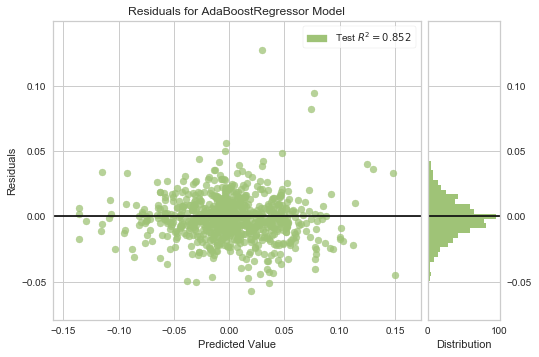

In [11]:
plot_model(boosted_knn)

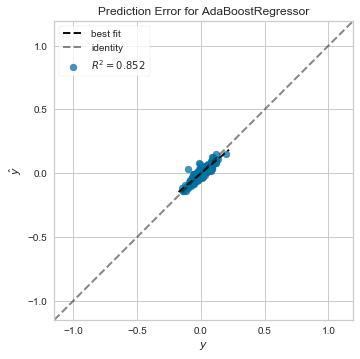

In [12]:
plot_model(boosted_knn, 'error')

In [13]:
et = create_model('et')

,MAE,MSE,RMSE,R2,ME
0,0.0181,0.0006,0.0244,0.6033,0.0823
1,0.0220,0.0010,0.0311,0.5849,0.1508
2,0.0200,0.0007,0.0270,0.6304,0.1196
3,0.0202,0.0007,0.0263,0.6707,0.0849
4,0.0186,0.0006,0.0243,0.6588,0.0863
5,0.0200,0.0007,0.0271,0.6115,0.1066
6,0.0190,0.0007,0.0257,0.6654,0.0850
7,0.0198,0.0007,0.0266,0.6092,0.1035
8,0.0171,0.0005,0.0228,0.7329,0.1141
9,0.0209,0.0009,0.0301,0.5567,0.1277


In [14]:
bagged_et = ensemble_model(et)

,MAE,MSE,RMSE,R2,ME
0,0.0199,0.0007,0.0265,0.5325,0.0806
1,0.0237,0.0010,0.0321,0.5588,0.1364
2,0.0225,0.0009,0.0302,0.5365,0.1303
3,0.0227,0.0009,0.0299,0.5770,0.1180
4,0.0199,0.0006,0.0255,0.6236,0.0819
5,0.0223,0.0009,0.0292,0.5485,0.0995
6,0.0223,0.0009,0.0293,0.5649,0.0998
7,0.0221,0.0008,0.0285,0.5495,0.0998
8,0.0210,0.0008,0.0275,0.6127,0.1167
9,0.0228,0.0010,0.0309,0.5306,0.1089


In [15]:
boosted_et = ensemble_model(et, method='Boosting')

,MAE,MSE,RMSE,R2,ME
0,0.0208,0.0007,0.0268,0.5207,0.0738
1,0.0245,0.0010,0.0322,0.5567,0.1461
2,0.0221,0.0008,0.0286,0.5864,0.1167
3,0.0229,0.0008,0.0287,0.6088,0.0897
4,0.0210,0.0007,0.0261,0.6038,0.0753
5,0.0224,0.0008,0.0288,0.5603,0.1121
6,0.0211,0.0008,0.0279,0.6050,0.1051
7,0.0227,0.0008,0.0289,0.5374,0.0921
8,0.0212,0.0008,0.0279,0.6010,0.1275
9,0.0233,0.0009,0.0304,0.5473,0.1040


In [16]:
tuned_et = tune_model('et')

,MAE,MSE,RMSE,R2,ME
0,0.0168,0.0005,0.0229,0.6509,0.0720
1,0.0209,0.0009,0.0306,0.5997,0.1529
2,0.0195,0.0007,0.0273,0.6217,0.1405
3,0.0187,0.0006,0.0253,0.6956,0.1062
4,0.0183,0.0006,0.0237,0.6732,0.0713
5,0.0189,0.0006,0.0253,0.6613,0.1016
6,0.0183,0.0006,0.0250,0.6833,0.0853
7,0.0184,0.0006,0.0241,0.6792,0.0889
8,0.0179,0.0005,0.0232,0.7240,0.1082
9,0.0205,0.0008,0.0281,0.6141,0.1108


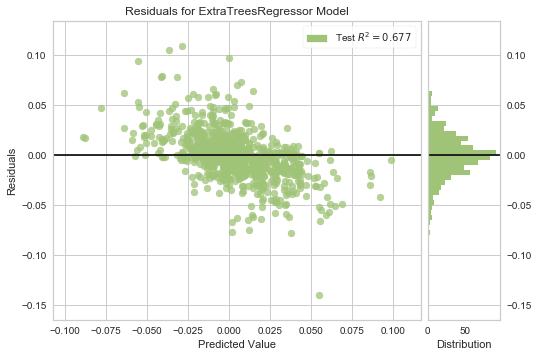

In [17]:
plot_model(tuned_et)

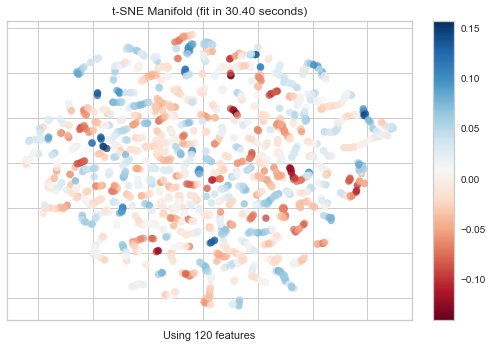

In [19]:
plot_model(tuned_et, 'manifold')

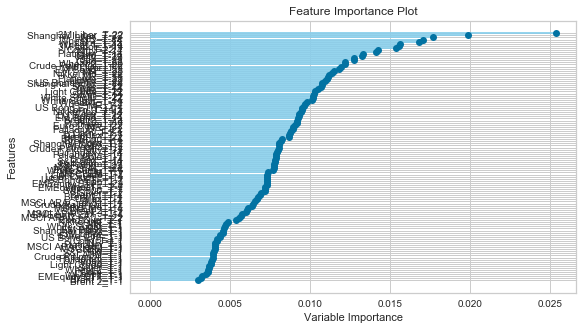

In [20]:
plot_model(tuned_et, 'feature') #have to restrict to top 10 in pycaret 0.0.4

In [21]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

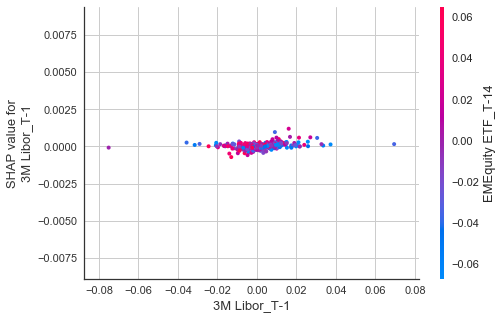

In [23]:
interpret_model(tuned_et, type='correlation')

## AutoML 

In [25]:
aml1 = automl(target_metric='R2')

,Model,MAE,MSE,RMSE,R2,ME
0,Stacking Regressor,0.0114,0.0002,0.0157,0.8711,0.0748
1,Stacking Regressor,0.0114,0.0002,0.0157,0.8706,0.0764
2,Stacking Regressor,0.0114,0.0002,0.0157,0.8703,0.0752
3,Stacking Regressor,0.0115,0.0003,0.0158,0.869,0.0779
4,Stacking Regressor,0.0115,0.0003,0.0159,0.8667,0.0787
5,Ensemble K Neighbors Regressor (Boosting),0.012,0.0003,0.0167,0.8529,0.0866
6,K Neighbors Regressor,0.0145,0.0004,0.0206,0.7773,0.0904
7,Ensemble K Neighbors Regressor (Bagging),0.0149,0.0005,0.0211,0.7673,0.0901
8,Voting Regressor,0.0169,0.0005,0.0224,0.7377,0.0902
9,Voting Regressor,0.0201,0.0007,0.0259,0.65,0.0938


## 13 Models in Top Stacking Regressor

In [28]:
for i in aml1:
    print(i)

AdaBoostRegressor(base_estimator=ExtraTreesRegressor(bootstrap=False,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators='warn',
                                                     n_jobs=None,
                                                     oob_score=False,
                                             

                          validation_fraction=0.1, verbose=0, warm_start=False)
AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators='warn',
                                                       n_jobs=None,
            